In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [140]:
df=pd.read_csv("train_house.csv")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)

In [141]:
df.shape

(1460, 81)

In [142]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [143]:
df=df.drop("Id",axis=1)

In [144]:
df.isnull().sum()
# bazı değişkenler evde o özellik olmadığı için boş değerle doldurulmuş mesela garajı olmayan bir evin GarageType depğişkeni null olarak kaydedilmiş
# bundan kaçınmak için null yerine olmayan o özellik için notexist olarak doldururum.

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [145]:
num_col=[i for i in df.columns if df[i].dtypes!="O"]


In [146]:
df["GarageYrBlt"].fillna(0,inplace=True)


In [147]:
no_cols=[i for i in df.columns if df[i].dtypes=="O" and df[i].isnull().any]
df[no_cols]
for col in no_cols:
   df[col].fillna("notexist",inplace=True)

In [148]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley              0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual           0
BsmtCond           0
BsmtExposure       0
BsmtFinType1       0
BsmtFinSF1         0
BsmtFinType2       0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath 

In [149]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()


count    1460.000000
mean       56.897260
std        42.300571
min        20.000000
5%         20.000000
10%        20.000000
20%        20.000000
30%        20.000000
40%        30.000000
50%        50.000000
60%        60.000000
70%        60.000000
80%        80.000000
90%       120.000000
95%       160.000000
99%       190.000000
max       190.000000
Name: MSSubClass, dtype: float64


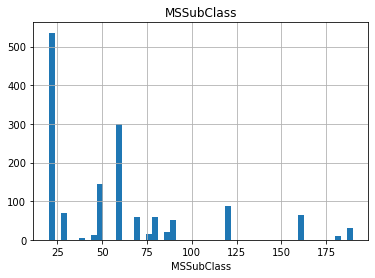

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
5%         34.000000
10%        44.000000
20%        53.000000
30%        60.000000
40%        63.000000
50%        69.000000
60%        74.000000
70%        79.000000
80%        85.000000
90%        96.000000
95%       107.000000
99%       141.000000
max       313.000000
Name: LotFrontage, dtype: float64


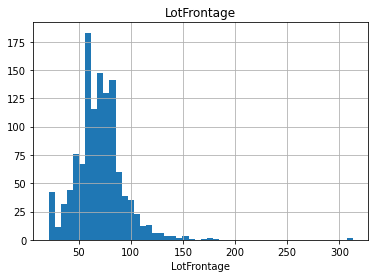

count      1460.000000
mean      10516.828082
std        9981.264932
min        1300.000000
5%         3311.700000
10%        5000.000000
20%        7078.400000
30%        8063.700000
40%        8793.400000
50%        9478.500000
60%       10198.200000
70%       11066.500000
80%       12205.800000
90%       14381.700000
95%       17401.150000
99%       37567.640000
max      215245.000000
Name: LotArea, dtype: float64


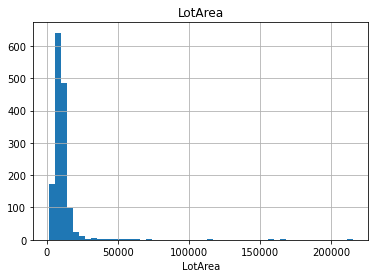

count    1460.000000
mean        6.099315
std         1.382997
min         1.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         6.000000
70%         7.000000
80%         7.000000
90%         8.000000
95%         8.000000
99%        10.000000
max        10.000000
Name: OverallQual, dtype: float64


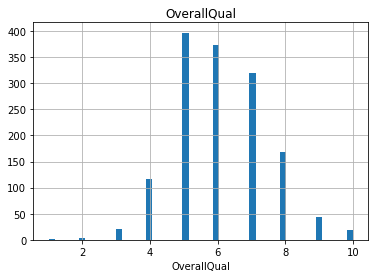

count    1460.000000
mean        5.575342
std         1.112799
min         1.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         5.000000
40%         5.000000
50%         5.000000
60%         5.000000
70%         6.000000
80%         7.000000
90%         7.000000
95%         8.000000
99%         9.000000
max         9.000000
Name: OverallCond, dtype: float64


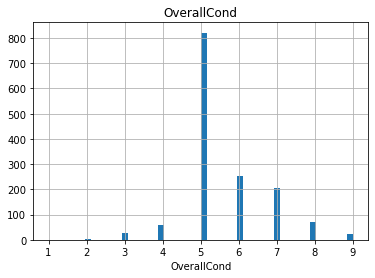

count    1460.000000
mean     1971.267808
std        30.202904
min      1872.000000
5%       1916.000000
10%      1924.900000
20%      1947.800000
30%      1958.000000
40%      1965.000000
50%      1973.000000
60%      1984.000000
70%      1997.300000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearBuilt, dtype: float64


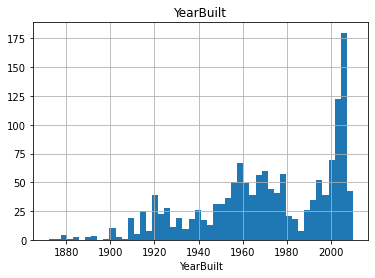

count    1460.000000
mean     1984.865753
std        20.645407
min      1950.000000
5%       1950.000000
10%      1950.000000
20%      1961.800000
30%      1971.000000
40%      1980.000000
50%      1994.000000
60%      1998.000000
70%      2002.000000
80%      2005.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: YearRemodAdd, dtype: float64


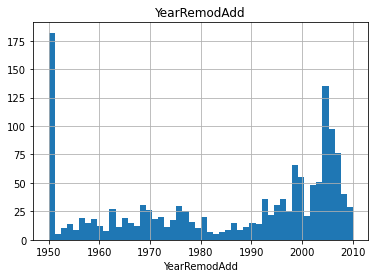

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%        16.000000
70%       117.000000
80%       206.000000
90%       335.000000
95%       456.000000
99%       791.920000
max      1600.000000
Name: MasVnrArea, dtype: float64


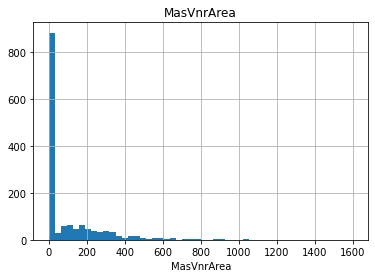

count    1460.000000
mean      443.639726
std       456.098091
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%       218.600000
50%       383.500000
60%       525.600000
70%       655.000000
80%       806.400000
90%      1065.500000
95%      1274.000000
99%      1572.410000
max      5644.000000
Name: BsmtFinSF1, dtype: float64


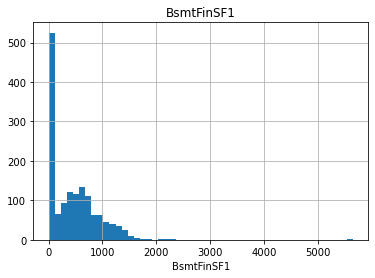

count    1460.000000
mean       46.549315
std       161.319273
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       117.200000
95%       396.200000
99%       830.380000
max      1474.000000
Name: BsmtFinSF2, dtype: float64


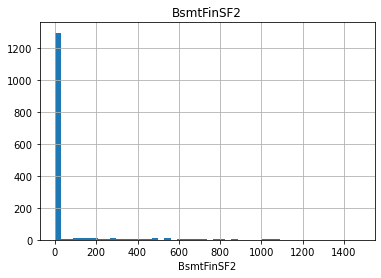

count    1460.000000
mean      567.240411
std       441.866955
min         0.000000
5%          0.000000
10%        74.900000
20%       172.000000
30%       280.000000
40%       374.600000
50%       477.500000
60%       604.400000
70%       736.000000
80%       896.000000
90%      1232.000000
95%      1468.000000
99%      1797.050000
max      2336.000000
Name: BsmtUnfSF, dtype: float64


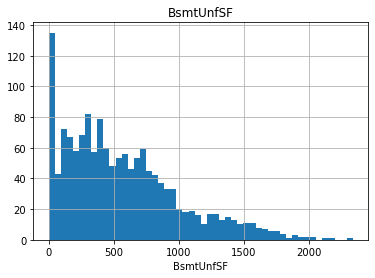

count    1460.000000
mean     1057.429452
std       438.705324
min         0.000000
5%        519.300000
10%       636.900000
20%       755.800000
30%       840.000000
40%       910.000000
50%       991.500000
60%      1088.000000
70%      1216.000000
80%      1391.200000
90%      1602.200000
95%      1753.000000
99%      2155.050000
max      6110.000000
Name: TotalBsmtSF, dtype: float64


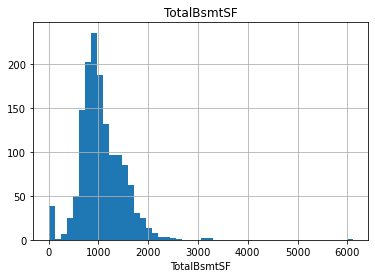

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
5%        672.950000
10%       756.900000
20%       848.000000
30%       915.700000
40%      1000.200000
50%      1087.000000
60%      1182.000000
70%      1314.000000
80%      1482.400000
90%      1680.000000
95%      1831.250000
99%      2219.460000
max      4692.000000
Name: 1stFlrSF, dtype: float64


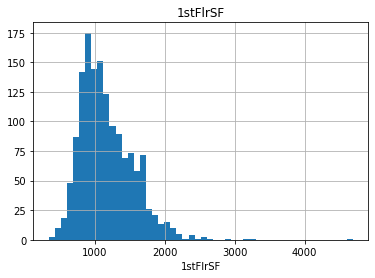

count    1460.000000
mean      346.992466
std       436.528436
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       455.400000
70%       672.000000
80%       796.200000
90%       954.200000
95%      1141.050000
99%      1418.920000
max      2065.000000
Name: 2ndFlrSF, dtype: float64


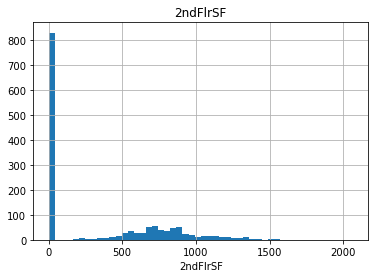

count    1460.000000
mean        5.844521
std        48.623081
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       360.000000
max       572.000000
Name: LowQualFinSF, dtype: float64


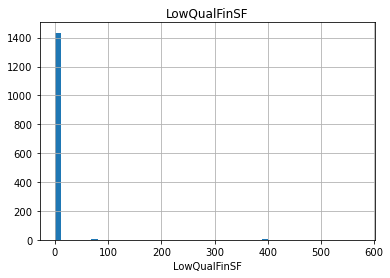

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
5%        848.000000
10%       912.000000
20%      1066.600000
30%      1208.000000
40%      1339.000000
50%      1464.000000
60%      1578.000000
70%      1709.300000
80%      1869.000000
90%      2158.300000
95%      2466.100000
99%      3123.480000
max      5642.000000
Name: GrLivArea, dtype: float64


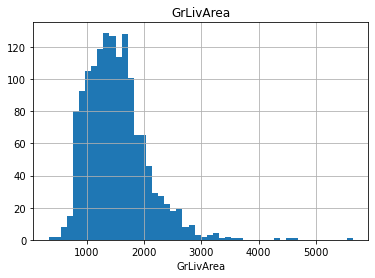

count    1460.000000
mean        0.425342
std         0.518911
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
99%         2.000000
max         3.000000
Name: BsmtFullBath, dtype: float64


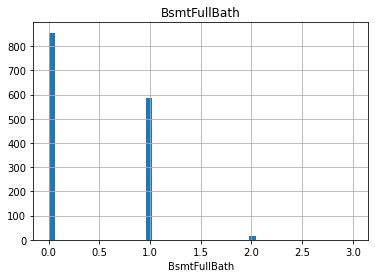

count    1460.000000
mean        0.057534
std         0.238753
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         1.000000
99%         1.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64


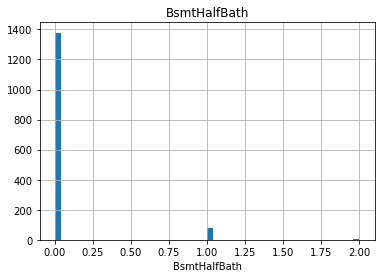

count    1460.000000
mean        1.565068
std         0.550916
min         0.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         2.000000
95%         2.000000
99%         3.000000
max         3.000000
Name: FullBath, dtype: float64


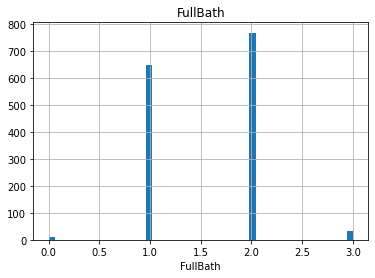

count    1460.000000
mean        0.382877
std         0.502885
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
99%         1.000000
max         2.000000
Name: HalfBath, dtype: float64


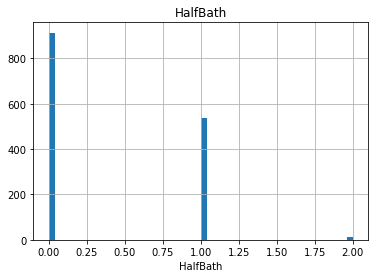

count    1460.000000
mean        2.866438
std         0.815778
min         0.000000
5%          2.000000
10%         2.000000
20%         2.000000
30%         3.000000
40%         3.000000
50%         3.000000
60%         3.000000
70%         3.000000
80%         3.000000
90%         4.000000
95%         4.000000
99%         5.000000
max         8.000000
Name: BedroomAbvGr, dtype: float64


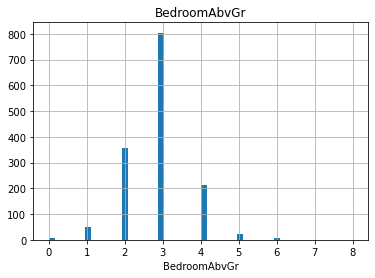

count    1460.000000
mean        1.046575
std         0.220338
min         0.000000
5%          1.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         1.000000
50%         1.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
95%         1.000000
99%         2.000000
max         3.000000
Name: KitchenAbvGr, dtype: float64


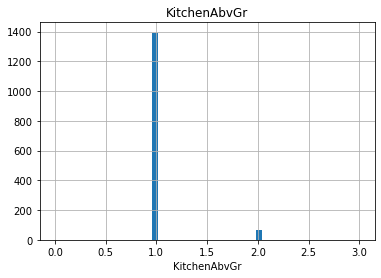

count    1460.000000
mean        6.517808
std         1.625393
min         2.000000
5%          4.000000
10%         5.000000
20%         5.000000
30%         6.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%         9.000000
95%        10.000000
99%        11.000000
max        14.000000
Name: TotRmsAbvGrd, dtype: float64


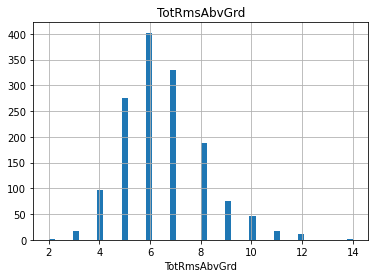

count    1460.000000
mean        0.613014
std         0.644666
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         1.000000
60%         1.000000
70%         1.000000
80%         1.000000
90%         1.000000
95%         2.000000
99%         2.000000
max         3.000000
Name: Fireplaces, dtype: float64


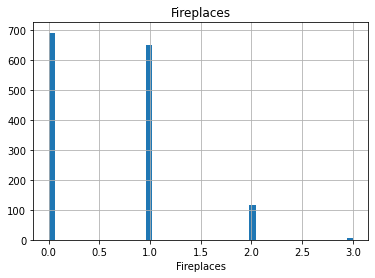

count    1460.000000
mean     1868.739726
std       453.697295
min         0.000000
5%          0.000000
10%      1928.000000
20%      1954.000000
30%      1962.000000
40%      1970.000000
50%      1977.000000
60%      1990.000000
70%      1998.000000
80%      2003.000000
90%      2006.000000
95%      2007.000000
99%      2009.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


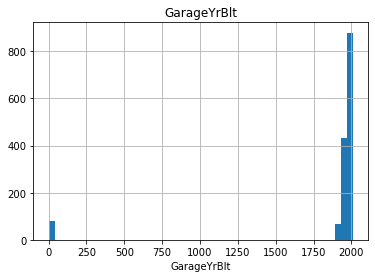

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
5%          0.000000
10%         1.000000
20%         1.000000
30%         1.000000
40%         2.000000
50%         2.000000
60%         2.000000
70%         2.000000
80%         2.000000
90%         3.000000
95%         3.000000
99%         3.000000
max         4.000000
Name: GarageCars, dtype: float64


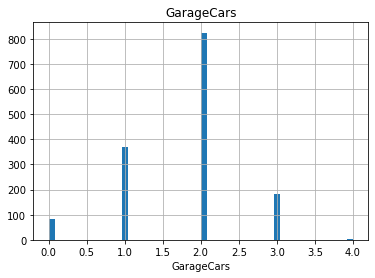

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
5%          0.000000
10%       240.000000
20%       295.600000
30%       384.000000
40%       440.000000
50%       480.000000
60%       516.000000
70%       560.000000
80%       620.200000
90%       757.100000
95%       850.100000
99%      1002.790000
max      1418.000000
Name: GarageArea, dtype: float64


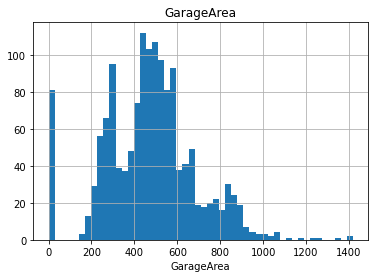

count    1460.000000
mean       94.244521
std       125.338794
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%       100.000000
70%       144.000000
80%       192.000000
90%       262.000000
95%       335.000000
99%       505.460000
max       857.000000
Name: WoodDeckSF, dtype: float64


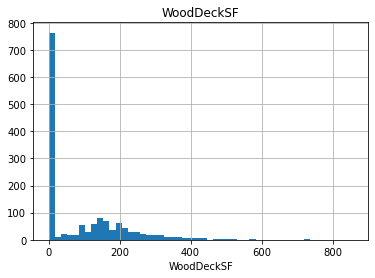

count    1460.000000
mean       46.660274
std        66.256028
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%        25.000000
60%        40.000000
70%        57.000000
80%        83.200000
90%       130.000000
95%       175.050000
99%       285.820000
max       547.000000
Name: OpenPorchSF, dtype: float64


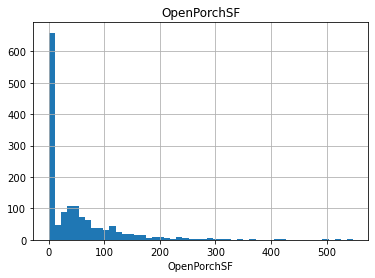

count    1460.000000
mean       21.954110
std        61.119149
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%       112.000000
95%       180.150000
99%       261.050000
max       552.000000
Name: EnclosedPorch, dtype: float64


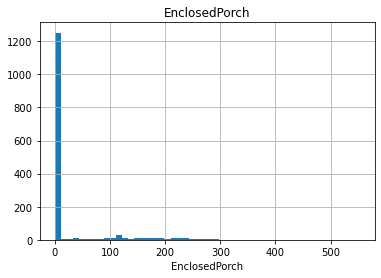

count    1460.000000
mean        3.409589
std        29.317331
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%       168.000000
max       508.000000
Name: 3SsnPorch, dtype: float64


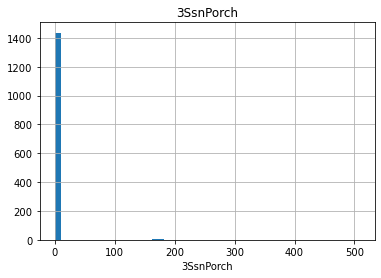

count    1460.000000
mean       15.060959
std        55.757415
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%       160.000000
99%       268.050000
max       480.000000
Name: ScreenPorch, dtype: float64


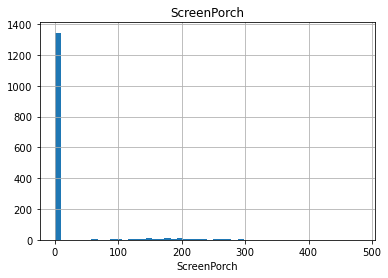

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
5%          0.000000
10%         0.000000
20%         0.000000
30%         0.000000
40%         0.000000
50%         0.000000
60%         0.000000
70%         0.000000
80%         0.000000
90%         0.000000
95%         0.000000
99%         0.000000
max       738.000000
Name: PoolArea, dtype: float64


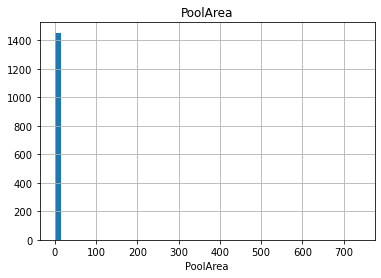

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
5%           0.000000
10%          0.000000
20%          0.000000
30%          0.000000
40%          0.000000
50%          0.000000
60%          0.000000
70%          0.000000
80%          0.000000
90%          0.000000
95%          0.000000
99%        700.000000
max      15500.000000
Name: MiscVal, dtype: float64


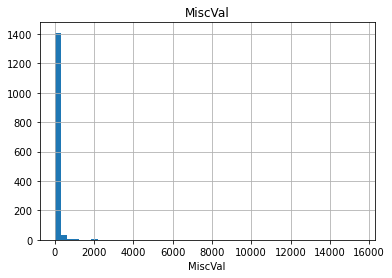

count    1460.000000
mean        6.321918
std         2.703626
min         1.000000
5%          2.000000
10%         3.000000
20%         4.000000
30%         5.000000
40%         6.000000
50%         6.000000
60%         7.000000
70%         7.000000
80%         8.000000
90%        10.000000
95%        11.000000
99%        12.000000
max        12.000000
Name: MoSold, dtype: float64


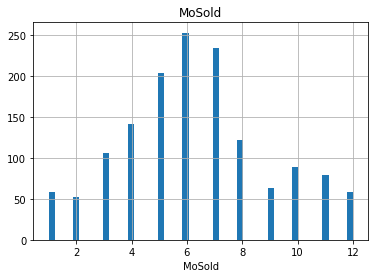

count    1460.000000
mean     2007.815753
std         1.328095
min      2006.000000
5%       2006.000000
10%      2006.000000
20%      2006.000000
30%      2007.000000
40%      2007.000000
50%      2008.000000
60%      2008.000000
70%      2009.000000
80%      2009.000000
90%      2010.000000
95%      2010.000000
99%      2010.000000
max      2010.000000
Name: YrSold, dtype: float64


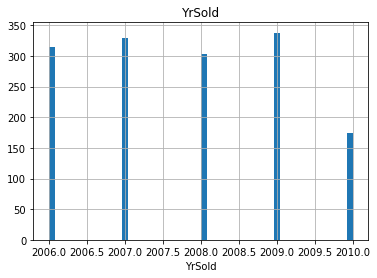

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
5%        88000.000000
10%      106475.000000
20%      124000.000000
30%      135500.000000
40%      147000.000000
50%      163000.000000
60%      179280.000000
70%      198620.000000
80%      230000.000000
90%      278000.000000
95%      326100.000000
99%      442567.010000
max      755000.000000
Name: SalePrice, dtype: float64


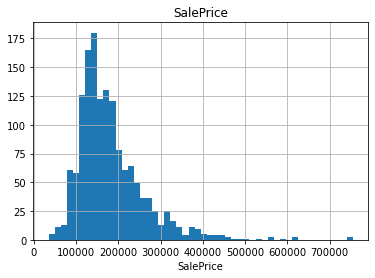

In [150]:
for i in num_col:
    num_summary(df,i,True)

In [151]:
cat_col=[i for i in df.columns if df[i].dtypes=="O"]


In [152]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(random_state=42)
imputed = imputer.fit_transform(df[num_col])
df[num_col] = pd.DataFrame(imputed, columns=df[num_col].columns)


In [153]:
"""from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df[cat_col] = imputer.fit_transform(df[cat_col])"""

"from sklearn.impute import SimpleImputer\nimputer = SimpleImputer(strategy='most_frequent')\ndf[cat_col] = imputer.fit_transform(df[cat_col])"

In [154]:
from sklearn.preprocessing import OneHotEncoder
categorical_data=df[cat_col]

In [155]:
encoder = OneHotEncoder(drop='first')

In [156]:
# Kategorik verileri dönüştürün
encoded_data = encoder.fit_transform(categorical_data)

# One-hot encoded veriyi bir DataFrame'e dönüştür
encoded_data = pd.DataFrame(encoded_data.toarray(),columns=encoder.get_feature_names_out(cat_col))

In [170]:
df=pd.concat([encoded_data,df],axis=1)

In [172]:
df.drop(df[cat_col],axis=1,inplace=True)

In [175]:
pip install lightgbm

In [181]:
import warnings
from catboost import CatBoostRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.exceptions import ConvergenceWarning
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV

In [188]:
y = np.log1p(df['SalePrice'])
X = df.drop(["SalePrice"], axis=1)

# Verinin eğitim ve tet verisi olarak bölünmesi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)

models = [('LR', LinearRegression()),
          ("Ridge", Ridge()),
          ("Lasso", Lasso()),
          ("ElasticNet", ElasticNet()),
          #('KNN', KNeighborsRegressor()),
          ('CART', DecisionTreeRegressor()),
          ('RF', RandomForestRegressor()),
          #('SVR', SVR()),
          ('GBM', GradientBoostingRegressor()),
          ("XGBoost", XGBRegressor(objective='reg:squarederror')),
          ("CatBoost", CatBoostRegressor(verbose=False))]

for name, regressor in models:
    rmse = np.mean(np.sqrt(-cross_val_score(regressor, X, y, cv=5, scoring="neg_mean_squared_error")))
    print(f"RMSE: {round(rmse, 4)} ({name}) ")


RMSE: 0.1835 (LR) 
RMSE: 0.1458 (Ridge) 
RMSE: 0.1964 (Lasso) 
RMSE: 0.1884 (ElasticNet) 
RMSE: 0.2034 (CART) 
RMSE: 0.1437 (RF) 
RMSE: 0.129 (GBM) 
RMSE: 0.1416 (XGBoost) 
RMSE: 0.1215 (CatBoost) 
